<a href="https://colab.research.google.com/github/adelriscom/DataScience/blob/main/CDSC_Introduction_statistics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [47]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import fetch_openml

In [48]:
# dataset de titanic
titanic = fetch_openml('titanic', version=1, as_frame=True)
print(titanic.DESCR)

**Author**: Frank E. Harrell Jr., Thomas Cason  
**Source**: [Vanderbilt Biostatistics](http://biostat.mc.vanderbilt.edu/wiki/pub/Main/DataSets/titanic.html)  
**Please cite**:   

The original Titanic dataset, describing the survival status of individual passengers on the Titanic. The titanic data does not contain information from the crew, but it does contain actual ages of half of the passengers. The principal source for data about Titanic passengers is the Encyclopedia Titanica. The datasets used here were begun by a variety of researchers. One of the original sources is Eaton & Haas (1994) Titanic: Triumph and Tragedy, Patrick Stephens Ltd, which includes a passenger list created by many researchers and edited by Michael A. Findlay.

Thomas Cason of UVa has greatly updated and improved the titanic data frame using the Encyclopedia Titanica and created the dataset here. Some duplicate passengers have been dropped, many errors corrected, many missing ages filled in, and new variable

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [49]:
titanic_df = pd.DataFrame(data=titanic.data)
titanic_df.sample(10)

,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
167,1.0,"Hoyt, Mrs. Frederick Maxfield (Jane Anne Forby)",female,35.0,1.0,0.0,19943,90.0000,C93,S,D,NaN,"New York, NY / Stamford CT"
594,2.0,"Wheadon, Mr. Edward H",male,66.0,0.0,0.0,C.A. 24579,10.5000,None,S,None,NaN,"Guernsey, England / Edgewood, RI"
1054,3.0,"Naughton, Miss. Hannah",female,NaN,0.0,0.0,365237,7.7500,None,Q,None,NaN,None
301,1.0,"Walker, Mr. William Anderson",male,47.0,0.0,0.0,36967,34.0208,D46,S,None,NaN,"East Orange, NJ"
863,3.0,"Hendekovic, Mr. Ignjac",male,28.0,0.0,0.0,349243,7.8958,None,S,None,306.0,None
119,1.0,"Frauenthal, Dr. Henry William",male,50.0,2.0,0.0,PC 17611,133.6500,None,S,5,NaN,"New York, NY"
36,1.0,"Bowerman, Miss. Elsie Edith",female,22.0,0.0,1.0,113505,55.0000,E33,S,6,NaN,"St Leonards-on-Sea, England Ohio"
622,3.0,"Andersson, Master. Sigvard Harald Elias",male,4.0,4.0,2.0,347082,31.2750,None,S,None,NaN,"Sweden Winnipeg, MN"
370,2.0,"Christy, Miss. Julie Rachel",female,25.0,1.0,1.0,237789,30.0000,None,S,12,NaN,London
750,3.0,"Danoff, Mr. Yoto",male,27.0,0.0,0.0,349219,7.8958,None,S,None,NaN,"Bulgaria Chicago, IL"


In [50]:
titanic_df.isna().sum()

pclass          0
name            0
sex             0
age           263
sibsp           0
parch           0
ticket          0
fare            1
cabin        1014
embarked        2
boat          823
body         1188
home.dest     564
dtype: int64

In [51]:
import seaborn as sns

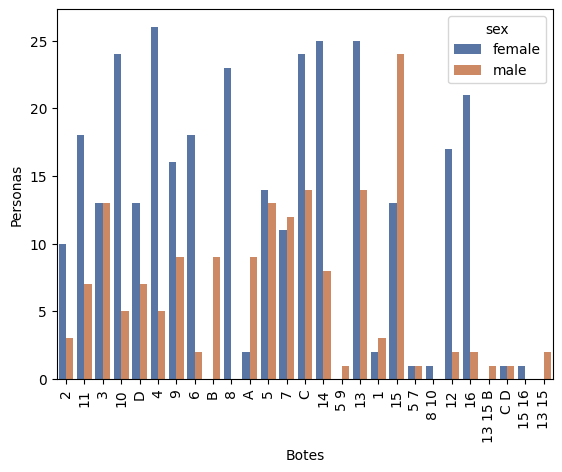

In [52]:
sns.set_palette("deep")
sns.countplot(data=titanic_df, x='boat', hue='sex')
plt.xticks(rotation=90)
plt.xlabel("Botes")
plt.ylabel("Personas")
plt.show()

In [53]:
titanic_df['age'].describe()

count    1046.000000
mean       29.881135
std        14.413500
min         0.166700
25%        21.000000
50%        28.000000
75%        39.000000
max        80.000000
Name: age, dtype: float64

<Axes: xlabel='age', ylabel='Count'>

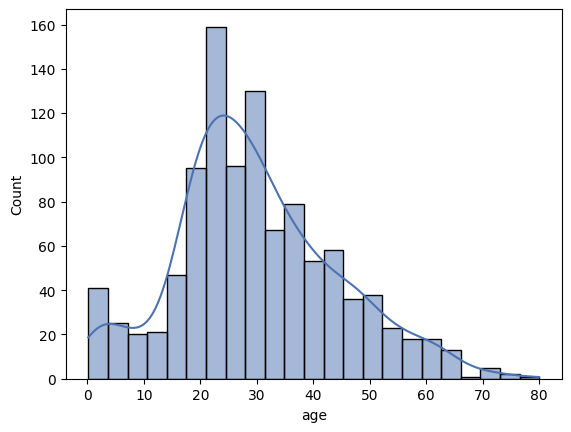

In [54]:
# Edad de las personas
sns.histplot(data=titanic_df, x='age', kde=True)

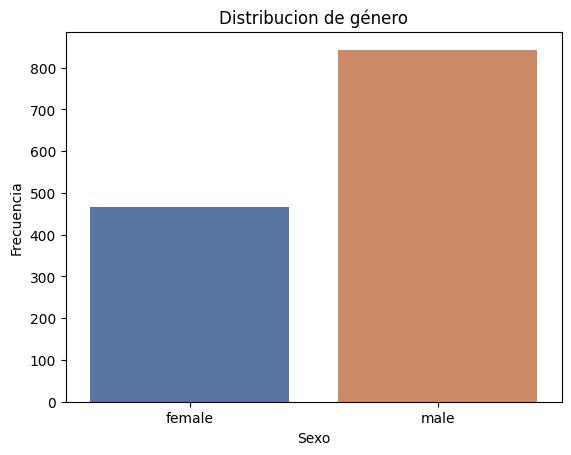

In [55]:
sns.countplot(data=titanic_df, x='sex')
plt.ylabel("Frecuencia")
plt.xlabel("Sexo")
plt.title("Distribucion de género")
plt.show()

<Axes: >

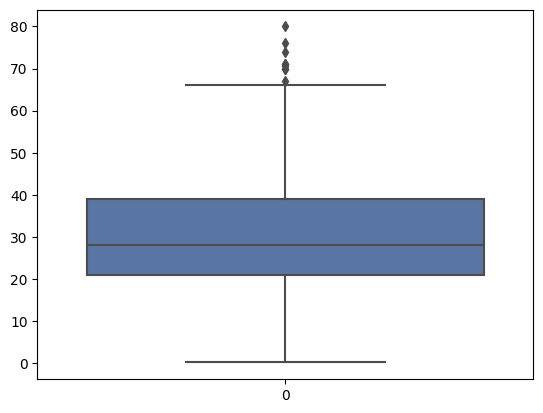

In [56]:
sns.boxplot(titanic_df['age'])

# Outliers / Valores atípicos

>> Un valor atípico es una observación que es nuericamente distante al resto de los datos

In [57]:
x = pd.Series([30,31,32,34,40,41,46,48,2])

<Axes: >

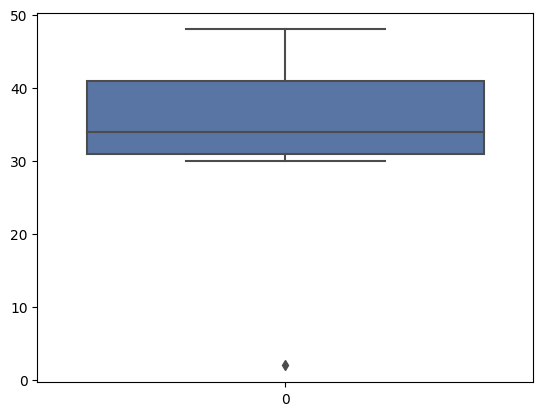

In [58]:
sns.boxplot(x)

### Estadístico
Es cualquier función real medible de la muestra de una variable aleatoría

### variable aleatoria

es una función que asigna un valor al resultado de un experimento aleatorio (0.5 cara, 0.5 cruz)

### Medidas de tendencia central

- Media: $\bar{X} = \frac{\Sigma_{i=1} X_i}{N}$ = (29+29+34+41+46) / 4

La media es sensible a valores atipicos (no es robusta)



### Mediana
Representa el valor de la varible de posición central en un conjunto **ORDENADO**. Medida robusta por que no depende de valores atípicos.

Edades = {41,34,29,29,32} Edades= {29,29,32,34,41} para datos impares es el valor central

Mediana(Edades) = 32

Edades= {29,29,34,41} para datos pares es el promedio de los valors centrales

Mediana(Edades) = (29+34)/2 = 31.5

### Moda
Es el valor que aparece con mayor frecuencia en un conjunto de datos.
Para el conjunto Edades la moda es 29. Es una medida de tendencia central robusta.

D = {29,29,30,30}, Moda(D)={29,30} Bimodal. Si los valores repetidos son > 2 entonces esta seria una moda multimodal.

In [59]:
print("Media de edad de titanic: ", titanic_df['age'].mean())
print("Media de la tarifa: ", titanic_df['fare'].mean())

Media de edad de titanic:  29.8811345124283
Media de la tarifa:  33.29547928134557


In [60]:
titanic_df.age.describe()

count    1046.000000
mean       29.881135
std        14.413500
min         0.166700
25%        21.000000
50%        28.000000
75%        39.000000
max        80.000000
Name: age, dtype: float64

### Media recortada
Recorta valores extremos (inferior y superior) ya que generalment estos pueden afectar a la media en caso de que existan outliers

### Media ponderada

In [61]:
from scipy.stats import trim_mean

# # ordena un vector de menor a mayor y recorta un % de la cabeza y de la cola de ese vector
# # debo realizar un imputación de la columna
# print("l amedia recortada en un 10% de las edades es: ", trim_mean(titanic_df['age'], 0.1))

In [62]:
titanic_df.age.isna().sum()
# fillna: reemplazar los valores NaN por media, mediana, RIQ

263

In [64]:
# Reemplazo los NaN por la medis
titanic_df.age.fillna(titanic_df.age.median(), inplace=True) # inplace true me sobreescribe el df original

In [45]:
titanic_df.isna().sum() # reemplazamos todos los nulos por la mediana

pclass       0
name         0
sex          0
age          0
sibsp        0
parch        0
ticket       0
fare         0
cabin        0
embarked     2
boat         0
body         0
home.dest    0
dtype: int64

In [66]:
print("l amedia recortada en un 10% de las edades es: ", trim_mean(titanic_df['age'], 0.05))
# Recorte en memoria

l amedia recortada en un 10% de las edades es:  29.208651399491096


### Medidas de variablilidad o dispersión
La medida de dispersión de los valore de la variable X alrededor de un estadístico.


- Var(X): Nos habla de la dispersión de los dados en torno a la media.
- Desvío estándar
- Coeficiente de variación
- Rango
- Percentiles